## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## ОГЛАВЛЕНИЕ

1. [Открытие данных и изучение общей информации](#start)
2. [Предобработка данных](#preprocessing)  
    * [Обработка пропусков](#null)  
    * [Замена типа данных](#duplicates)
    * [Обработка дубликатов](#duplicates)  
    * [Лемматизация](#duplicates)  
    * [Категоризация данных](#duplicates) 
    
3. [Ответ на вопросы](#duplicates)  
4. [Общий вывод](#duplicates)


### Шаг 1. Открытие данных и изучение общей информации 
<a name="#start"></a>

In [1]:
# прочитаем DataFrame и посмотрим сводную информацию
import pandas as pd
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [2]:
# выведем на экран 20 верхних строк DataFrame
df.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
# выведем на экран 20 нижних строк DataFrame
df.tail(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21505,0,338904.866406,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21506,1,-1556.249906,33,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,145541.993320,свадьба
21507,1,-79.832064,32,среднее,1,гражданский брак,1,F,госслужащий,0,98180.279152,сделка с подержанным автомобилем
21508,0,386497.714078,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161.054124,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21510,2,NaN,28,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,приобретение автомобиля
21511,0,-612.569129,29,высшее,0,гражданский брак,1,F,сотрудник,1,140068.472941,покупка жилья для сдачи
21512,0,-165.377752,26,высшее,0,Не женат / не замужем,4,M,компаньон,0,147301.457769,получение дополнительного образования
21513,0,-1166.216789,35,среднее,1,женат / замужем,0,F,сотрудник,0,250986.142309,покупка жилья
21514,0,-280.469996,27,неоконченное высшее,2,Не женат / не замужем,4,M,компаньон,0,355988.407188,строительство недвижимости


In [4]:
# посмотрим уникальные значения столбца 'children' и их количество
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [5]:
# выведем на экран 20 верхних строк DataFrame с отрицательными значениями и значениями '20'
# в столбце 'children' 
df.loc[(df['children'] == (-1)) | (df['children'] == 20)].head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
705,-1,-902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
720,20,-855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
742,-1,-3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,349987.852217,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,NaN,57,Среднее,1,женат / замужем,0,F,пенсионер,0,NaN,на покупку своего автомобиля
1074,20,-3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
1363,-1,-1195.264956,55,СРЕДНЕЕ,1,женат / замужем,0,F,компаньон,0,69550.699692,профильное образование
1929,-1,-1461.303336,38,среднее,1,Не женат / не замужем,4,M,сотрудник,0,109121.569013,покупка жилья


In [6]:
# сгруппируем данные по столбцам 'income_type' и 'children' и выведем количество значений столбца
# 'children'
df.groupby(['income_type', 'children'])['children'].count()

income_type      children
безработный       0             1
                  1             1
в декрете         2             1
госслужащий      -1             4
                  0           866
                  1           355
                  2           188
                  3            36
                  4             7
                  5             1
                  20            2
компаньон        -1             9
                  0          3142
                  1          1300
                  2           529
                  3            79
                  4             2
                  5             2
                  20           22
пенсионер        -1             8
                  0          3537
                  1           275
                  2            20
                  3             6
                  4             1
                  20            9
предприниматель   0             2
сотрудник        -1            26
                  0   

In [7]:
# определим долю пенсионеров без детей
(df['children'][(df['children'] == 0) & (df['income_type'] == 'пенсионер')].count() / df['children'][df['income_type'] == 'пенсионер'].count() * 100).round(1)

91.7

In [8]:
# сгруппируем данные по столбцу 'income_type' и выведем минимальные и максимальные значения столбца
# 'days_employed'
df.groupby('income_type').agg({'days_employed' : ['min','max']})

days_employed               
                           min            max
income_type                                  
безработный      337524.466835  395302.838654
в декрете         -3296.759962   -3296.759962
госслужащий      -15193.032201     -39.954170
компаньон        -17615.563266     -30.195337
пенсионер        328728.720605  401755.400475
предприниматель    -520.848083    -520.848083
сотрудник        -18388.949901     -24.141633
студент            -578.751554    -578.751554

In [9]:
# посмотрим уникальные значения столбца 'dob_years' и их количество
df['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [10]:
# выведем на экран 20 верхних строк DataFrame с нулевыми значениями столбца 'dob_years'
df.loc[df['dob_years'] == 0]. head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,-2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,-1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,-1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
1149,0,-934.654854,0,среднее,1,женат / замужем,0,F,компаньон,0,201852.430096,покупка недвижимости
1175,0,370879.508002,0,среднее,1,женат / замужем,0,F,пенсионер,0,313949.845188,получение дополнительного образования
1386,0,-5043.219890,0,высшее,0,женат / замужем,0,M,госслужащий,0,240523.618071,сделка с автомобилем
1890,0,NaN,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,NaN,жилье
1898,0,370144.537021,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,127400.268338,на покупку автомобиля


In [11]:
# посмотрим уникальные значения столбца 'education' и их количество
df['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [12]:
# посмотрим уникальные значения столбца 'education_id' и их количество
df['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

In [13]:
# посмотрим уникальные значения столбца 'family_status' и их количество
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [14]:
# посмотрим уникальные значения столбца 'family_status_id' и их количество
df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [15]:
# посмотрим уникальные значения столбца 'gender' и их количество
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [16]:
# выведем на экран строку DataFrame с непонятным значением в столбце 'gender' 
df.loc[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


In [17]:
# посмотрим уникальные значения столбца 'income_type' и их количество
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [18]:
# посмотрим уникальные значения столбца 'debt' и их количество
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [19]:
# сгруппируем данные по столбцу 'income_type' и выведем минимальные и максимальные значения 
# столбца 'total_income'
df.groupby('income_type').agg({'total_income' : ['min', 'max']})

total_income              
                           min           max
income_type                                 
безработный       59956.991984  2.027225e+05
в декрете         53829.130729  5.382913e+04
госслужащий       29200.077193  9.104515e+05
компаньон         28702.812889  2.265604e+06
пенсионер         20667.263793  7.351033e+05
предприниматель  499163.144947  4.991631e+05
сотрудник         21367.648356  1.726276e+06
студент           98201.625314  9.820163e+04

In [20]:
# посмотрим уникальные значения столбца 'purpose' и их количество
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

### Вывод

При изучении информации из файла с данными установлены следующие проблемы: 
   1. В столбцах `days_employed` и `total_income` есть пропущенные значения, причем в обоих столбцах их количество и местоположение одинаково.  Причина, скорее всего, в том, что банковские работники при приеме анкет от кредитополучателей не всегда требуют указания в них всей необходимой информации. Взаимосвязь наличия пропущенных значений с другими показателями таблицы не установлена.  
   2. В столбцах `days_employed` и `total_income` значения относятся к вещественному типу, а не целочисленному.  
   3. В столбце `days_employed` есть отрицательные числа. Причина, скорее всего, в том, что эти данные хранились в таком формате, где разделителями столбцов являлись дефисы. В дальнейшем при объединении данных дефисы были распознаны как минусы. 
   4. В столбцах `education`  и `family_status` не все символы относятся к нижнему регистру.  
   5. В столбце `purpose` одинаковые по сути цели получения кредита показаны как разные. Причина, скорее всего, в том, что кредитополучатели самостоятельно  указывают в анкетах эти сведения.  
   6. В столбце `days_employed` у пенсионеров и безработных аномально большие значения трудового стажа. Причина, скорее всего, в том, что эти данные ошибочно были переведены в часы.  
   7. В столбце `children` имеются значения количества детей '-1' и '20'. Причина, скорее всего, в том, что произошла ошибка при вводе информации в базу. Так, при количестве детей '1' ввели '-1', при количестве детей '2' ввели '20'.
   8. В столбце `children`, скорее всего, указано количество несовершеннолетних детей, а не общее количество детей у кредитополучателя, так как доля пенсионеров без детей составляет 91,7%, что не может соответствовать истине.
   9. В столбце `dob_years` есть нулевые значения возраста. Причина, скорее всего, в том, что кредитополучатели не указывали данную информацию в анкетах, а в последующем при формировании базы в нее был введен нулевой возраст. Взаимосвязь отсутствия информации о возрасте с другими показателями таблицы не установлена. 
   10. В столбце `gender` есть значение 'XNA'.
   
   После консультации с кредитным отделом все указанные предположения подтвердились.

**Учитывая выявленные проблемы с предоставленными данными, необходимо произвести их предобработку. Для решения поставленных задач нам потребуются не все данные из файла, однако мы обработаем всю информацию, так как в последующем у кредитного отдела банка могут появиться другие запросы, которые нам будет нужно оперативно исполнить.**  

 ### Шаг 2. Предобработка данных <a id="#preprocessing"></a>

### Обработка пропусков <a id="#null"></a>

In [21]:
# заменим значения в столбце 'children'
df['children'] = df['children'].replace(20, 2)
df['children'] = df['children'].replace((-1), 1)
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [22]:
# заменим отрицательные значения в столбце 'days_employed' на положительные
df.loc[df['days_employed'] < 0, 'days_employed'] *= (-1)
df.groupby('income_type').agg({'days_employed' : ['min','max']})

days_employed               
                           min            max
income_type                                  
безработный      337524.466835  395302.838654
в декрете          3296.759962    3296.759962
госслужащий          39.954170   15193.032201
компаньон            30.195337   17615.563266
пенсионер        328728.720605  401755.400475
предприниматель     520.848083     520.848083
сотрудник            24.141633   18388.949901
студент             578.751554     578.751554

In [23]:
# разделим значения в столбце 'days_employed' для пенсионеров и безработных на 24
df.loc[(df['income_type'] == 'пенсионер') | (df['income_type'] == 'безработный'), 'days_employed'] /= 24
df.groupby('income_type').agg({'days_employed' : ['min','max']})

days_employed              
                          min           max
income_type                                
безработный      14063.519451  16470.951611
в декрете         3296.759962   3296.759962
госслужащий         39.954170  15193.032201
компаньон           30.195337  17615.563266
пенсионер        13697.030025  16739.808353
предприниматель    520.848083    520.848083
сотрудник           24.141633  18388.949901
студент            578.751554    578.751554

In [24]:
# определим долю нулевых значений в столбце 'dob_years'
(df['dob_years'][df['dob_years'] == 0].count() / df['dob_years'].count() * 100).round(1)

0.5

In [25]:
# удалим строки с нулевыми значениями в столбце 'dob_years'
df = df.drop(df[df['dob_years']  == 0].index).reset_index(drop = True)
df['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [26]:
# удалим строку с непонятным значением в столбце 'gender'
df = df.drop(df[df['gender']  == 'XNA'].index).reset_index(drop = True)
df['gender'].value_counts()

F    14164
M     7259
Name: gender, dtype: int64

In [27]:
# определим количество пропущенных значений в DataFrame
df.isnull().sum()

children               0
days_employed       2164
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2164
purpose                0
dtype: int64

In [28]:
# определим долю пропущенных значений в DataFrame
df.isna().mean()

children            0.000000
days_employed       0.101013
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.101013
purpose             0.000000
dtype: float64

In [29]:
# посмотрим статистические данные столбца 'days_employed'
df['days_employed'].describe()

count    19259.000000
mean      4641.903245
std       5355.803028
min         24.141633
25%        926.823974
50%       2197.320350
75%       5540.399763
max      18388.949901
Name: days_employed, dtype: float64

In [30]:
# заполним пропущенные значения в столбце 'days_employed' их медианами, сгруппированными
# по столбцу 'income_type'
df['days_employed'] = df['days_employed'].fillna(df.groupby('income_type')['days_employed'].transform('median'))

In [31]:
# посмотрим статистические данные столбца 'total_income'
df['total_income'].describe()

count    1.925900e+04
mean     1.674633e+05
std      1.030897e+05
min      2.066726e+04
25%      1.030929e+05
50%      1.450055e+05
75%      2.033503e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [32]:
# заполним пропущенные значения в столбце 'total_income' их медианами, сгруппированными
# по столбцу 'income_type'
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))

In [33]:
# повторно определим количество пропущенных значений в DataFrame
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Вывод

   В целях предобработки данных провели следующую работу:  
   1. В столбце `children` при помощи метода `replace` ошибочные значения количества детей '-1' заменили на '1', а '20' на '2'.  
   2. Данные в столбце `days_employed` умножили на '-1', вследствие чего значения стали положительными.  
   3. Данные в столбце `days_employed` для пенсионеров и безработных разделили на '24', вследствие чего значения преобразовались из часов в дни.
   4. Учитывая, что доля значений с нулевыми значениями возраста в столбце `dob_years` является незначительной (0,5%), строки с ними удалили при помощи метода `drop`.  
   5. Учитывая, что значение 'XNA' в столбце `gender` всего одно, строку с ним удалили при помощи метода `drop`.  
   6. Количество пропущенных значений в столбцах `days_employed` и `total_income` велико (по 2164 значений или 10,1% в каждом столбце), в связи с чем произвели их замену на медианы соответствующих столбцов, так как разброс значений каждого из этих показателей достаточно большой. Медианы рассчитали, сгруппировав данные по столбцу `income_type`. Замену произвели при помощи методов `fillna` и `transform`.       

### Замена типа данных <a name="#start"></a>

In [34]:
# преобразуем значения в столбце 'days_employed' из дней в года и  переименуем соответствующий столбец
df['days_employed'] /= 365
df = df.rename(columns = {'days_employed' : 'years_employed'})
df.groupby('income_type').agg({'years_employed' : ['min','max']})

years_employed           
                           min        max
income_type                              
безработный          38.530190  45.125895
в декрете             9.032219   9.032219
госслужащий           0.109463  41.624746
компаньон             0.082727  48.261817
пенсионер            37.526110  45.862489
предприниматель       1.426981   1.426981
сотрудник             0.066141  50.380685
студент               1.585621   1.585621

In [35]:
# переведем значения столбцов 'years_employed' и 'total_income'к целым числам
df['years_employed'] = df['years_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

In [36]:
# повторно посмотрим сводную информацию DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21423 entries, 0 to 21422
Data columns (total 12 columns):
children            21423 non-null int64
years_employed      21423 non-null int64
dob_years           21423 non-null int64
education           21423 non-null object
education_id        21423 non-null int64
family_status       21423 non-null object
family_status_id    21423 non-null int64
gender              21423 non-null object
income_type         21423 non-null object
debt                21423 non-null int64
total_income        21423 non-null int64
purpose             21423 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### Вывод

   В целях замены типов данных провели следующую работу:  
   1. Информация о трудовом стаже в днях является не очень наглядной, удобнее  и понятнее анализировать данные о трудовом стаже в полных годах. В связи с этим преобразовали значения в столбце `days_employed` из дней в года, разделив их на 365. Затем при помощи метода `rename` переименовали соответствующий столбец.  
   2. Значения столбцов `years_employed` и `total_income` заменили с вещественных на целочисленные при помощи метода `astype`.

### Обработка дубликатов <a id="#duplicates"></a>

In [37]:
# приведем к нижнему регистру все символы в столбце 'education'
df['education'] = df['education'].str.lower()
df['education'].value_counts()

среднее                15169
высшее                  5225
неоконченное высшее      741
начальное                282
ученая степень             6
Name: education, dtype: int64

In [38]:
# приведем к нижнему регистру все символы в столбце 'family_status'
df['family_status'] = df['family_status'].str.lower()
df['family_status'].value_counts()

женат / замужем          12331
гражданский брак          4155
не женат / не замужем     2797
в разводе                 1185
вдовец / вдова             955
Name: family_status, dtype: int64

In [39]:
# посчитаем количество дубликатов
df.duplicated().sum()

71

In [40]:
# удалим выявленные дубликаты
df = df.drop_duplicates().reset_index(drop = True)

In [41]:
# повторно посчитаем количество дубликатов
df.duplicated().sum()

0

### Вывод

   В целях обработки дубликатов провели следующую работу:  
   1. Привели к нижнему регистру все символы в столбцах `education` и `family_status` при помощи метода `str.lower`.  
   2. Установили количество строк с дубликатами (71). Причина появления дубликатов, скорее всего, в том, что некоторые анкеты кредитополучателей были случайно введены в базу данных по 2 раза. После консультации с кредитным отделом указанное предположение подтвердилось, в связи с чем при помощи метода `drop_duplicates` дубликаты были удалены.


### Лемматизация <a name="#start"></a>

In [42]:
# лемматизируем слова в столбце 'purpose' и добавим их в столбец 'purpose_group'
from pymystem3 import Mystem
m = Mystem() 
df['purpose_group'] = df['purpose'].apply(m.lemmatize)

In [43]:
# посчитаем количество упоминаний лемматизированных слов в столбце 'purpose'
from collections import Counter
Counter(m.lemmatize(' '.join(df['purpose'])))

Counter({'покупка': 5869,
         ' ': 54785,
         'жилье': 4436,
         'приобретение': 459,
         'автомобиль': 4284,
         'дополнительный': 902,
         'образование': 3995,
         'сыграть': 760,
         'свадьба': 2310,
         'операция': 2593,
         'с': 2904,
         'на': 2210,
         'проведение': 764,
         'для': 1286,
         'семья': 637,
         'недвижимость': 6327,
         'коммерческий': 1306,
         'жилой': 1224,
         'строительство': 1873,
         'собственный': 633,
         'подержать': 849,
         'свой': 2223,
         'со': 627,
         'заниматься': 900,
         'сделка': 938,
         'получение': 1309,
         'высокий': 1366,
         'подержанный': 113,
         'профильный': 435,
         'сдача': 649,
         'ремонт': 605,
         '\n': 1})

### Вывод

   В целях лемматизации провели следующую работу:   
   1. При помощи метода `lemmatize` провели лемматизацию слов в столбце `purpose`, затем лемматизированные слова при помощи метода `apply` добавили в созданный столбец `purpose_group`.  
   2. При помощи контейнера `Counter` посчитали количество упоминаний лемматизированных слов в столбце `purpose`.
   
   Для категоризации данных по цели кредита выделили следующие лемматизированные слова:  
      * 'свадьба'   
      * 'жилье' и 'недвижимость'   
      * 'автомобиль'   
      * 'образование'

### Категоризация данных <a name="#start"></a>

In [44]:
# определим долю кредитополучателей с 4 и 5 детьми в столбце 'children'
(df['children'][(df['children'] == 4) | (df['children'] == 5)].count() / df['children'].count() * 100).round(1)

0.2

In [45]:
# создадим функцию, применим ее для категоризации значений в столбце 'children' и добавим их в
# столбец 'children_group'
def children_categorized(children):
    if children == 0:
        return 'нет'
    if children == 1:
        return '1'
    if children == 2:
        return '2'
    return '3 и более'
df['children_group'] = df['children'].apply(children_categorized)
df['children_group'].value_counts()

нет          14021
1             4839
2             2114
3 и более      378
Name: children_group, dtype: int64

In [46]:
# разделим столбец 'total_income' на 5 интервалов
pd.cut(df['total_income'], 5)

0        (18422.063, 469654.4]
1        (18422.063, 469654.4]
2        (18422.063, 469654.4]
3        (18422.063, 469654.4]
4        (18422.063, 469654.4]
                 ...          
21347    (18422.063, 469654.4]
21348    (18422.063, 469654.4]
21349    (18422.063, 469654.4]
21350    (18422.063, 469654.4]
21351    (18422.063, 469654.4]
Name: total_income, Length: 21352, dtype: category
Categories (5, interval[float64]): [(18422.063, 469654.4] < (469654.4, 918641.8] < (918641.8, 1367629.2] < (1367629.2, 1816616.6] < (1816616.6, 2265604.0]]

In [47]:
# создадим функцию, применим ее для категоризации значений в столбце 'total_income' и добавим их в
# столбец 'total_income_group'
def total_income_categorized(total_income):
    if total_income <= 50000:
        return 'до 50 000'
    if 50000 < total_income <= 100000:
        return 'от 50 000 до 100 000'
    if 100000 < total_income <= 150000:
        return 'от 100 000 до 150 000'
    if 150000 < total_income <= 200000:
        return 'от 150 000 до 200 000'
    return 'свыше 200 000'
df['total_income_group'] = df['total_income'].apply(total_income_categorized)
df['total_income_group'].value_counts()

от 100 000 до 150 000    7130
свыше 200 000            5040
от 150 000 до 200 000    4742
от 50 000 до 100 000     4070
до 50 000                 370
Name: total_income_group, dtype: int64

In [48]:
# создадим функцию и применим ее для категоризации значений в столбце 'purpose_group'
def purpose_lemmatized(row):
    if 'свадьба' in row:
        return 'проведение свадьбы'
    elif ('жилье' in row) | ('недвижимость' in row):
        return 'операции с недвижимостью'
    elif 'автомобиль' in row:
        return 'приобретение автомобиля'
    else:
        return 'получение образования'
df['purpose_group'] = df['purpose_group'].apply(purpose_lemmatized)
df['purpose_group'].value_counts()

операции с недвижимостью    10763
приобретение автомобиля      4284
получение образования        3995
проведение свадьбы           2310
Name: purpose_group, dtype: int64

### Вывод

   В целях категоризации данных провели следующую работу:  
   1. Для решения вопроса о зависимости между наличием детей и возвратом кредита в срок создали следующие категории:  
   > нет детей   
   > 1 ребенок  
   > 2 детей  
   > 3 и более детей.  
   
   Таким образом были объединены в одну категорию кредитополучатели с 3 и более детьми, так как доля семей с 4 и 5 детьми является незначительной (0,2%). Для категоризации значений в столбце `children` создали функцию `children_categorized`, затем при помощи метода `apply` добавили их в созданный столбец `children_group`.
   2. Для решения вопроса о зависимости между семейным положением и возвратом кредита в срок категорирование не проводилось, так как имеющиеся значения семейного положения пригодны для дальнейшего анализа.  
   3. Для решения вопроса о зависимости между уровнем дохода и возвратом кредита в срок создали следующие категории:  
   > до 50 000  
   > от 50 000 до 100 000  
   > от 100 000 до 150 000  
   > от 150 000 до 200 000   
   > свыше 200 000.  
   
   Количество категорий установили 5, для распределения значений между ними применили метод `cut` с последующим округлением значений. Для категоризации значений в столбце `total_income` создали функцию `total_income_categorized`, затем при помощи метода `apply` добавили их в созданный столбец `total_income_group`.  
   4. Для решения вопроса о зависимости между целью кредита и возвратом его в срок создали следующие категории:  
   > для проведения свадьбы  
   > для осуществления операций с недвижимостью   
   > для приобретения автомобиля   
   > для получения образования.   
   
   Таким образом в одну категорию были объединены кредитополучатели фактически с одинаковыми целями кредита. Для категоризации значений в столбце `purpose_group` создали функцию `purpose_lemmatized`, затем при помощи метода `apply` заменили их.
   
   **Подготовка данных к анализу завершена.**   
   
   **Учитывая, что в столбце `debt` значения принимают '0', если кредит возвращен в срок, и '1', если кредит не возвращен в срок, количество значений этого столбца покажет общее количество кредитов, а сумма значений этого столбца - количество невозвращенных в срок кредитов.**

### Шаг 3. Ответ на вопросы <a name="#start"></a>

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [49]:
# создадим сводную таблицу с группировкой по столбцу 'income_type', добавим в нее итоговую строку,
# и столбец 'ratio'
df_pivot_income_type = df.pivot_table(index = ['income_type'], values = 'debt', aggfunc = ('count', 'sum'))
df_pivot_income_type.loc['total'] = df_pivot_income_type.sum()
df_pivot_income_type['ratio'] = ((df_pivot_income_type['sum'] / df_pivot_income_type['count']) * 100).round(1)
df_pivot_income_type

,count,sum,ratio
income_type,,,
безработный,2,1,50.0
в декрете,1,1,100.0
госслужащий,1451,86,5.9
компаньон,5057,375,7.4
пенсионер,3809,215,5.6
предприниматель,2,0,0.0
сотрудник,11029,1055,9.6
студент,1,0,0.0
total,21352,1733,8.1


In [50]:
# создадим сводную таблицу с группировкой по столбцу 'children_group' без учета данных по
# пенсионерам, добавим в нее итоговую строку
df_pivot_children = df.loc[df['income_type'] != 'пенсионер'].pivot_table(index = ['children_group'], values = 'debt', aggfunc = ('count', 'sum'))
df_pivot_children.loc['total'] = df_pivot_children.sum()
df_pivot_children

,count,sum
children_group,,
1,4556,428
2,2085,199
3 и более,371,30
нет,10531,861
total,17543,1518


In [51]:
# переименуем столбцы 'count' и 'sum' и добавим в таблицу столбец 'percent_non_return'
df_pivot_children = df_pivot_children.rename(columns = {'count' : 'number_of_credits', 'sum' : 'non_return'})
df_pivot_children['percent_non_return'] = ((df_pivot_children['non_return'] / df_pivot_children['number_of_credits']) * 100).round(1)
df_pivot_children

,number_of_credits,non_return,percent_non_return
children_group,,,
1,4556,428,9.4
2,2085,199,9.5
3 и более,371,30,8.1
нет,10531,861,8.2
total,17543,1518,8.7


[Text(0, 0.5, 'доля невозвращенных в срок кредитов, %'),
 Text(0.5, 0, 'количество детей'),
 Text(0.5, 1.0, 'Зависимость между наличием детей и возвратом кредита в срок')]

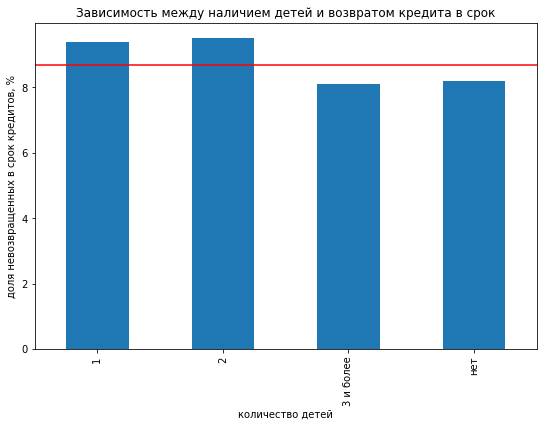

In [52]:
# создадим диаграмму по доле невозвращенных в срок кредитов с ее средним значением
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
df_pivot_children.iloc[:4]['percent_non_return'].plot(kind = 'bar', figsize = (9, 6), ax = ax)
ax.axhline(8.7, color = 'red')
ax.set(title = 'Зависимость между наличием детей и возвратом кредита в срок', xlabel = 'количество детей', ylabel = 'доля невозвращенных в срок кредитов, %')

In [53]:
# проведем сортировку таблицы по столбцу 'percent_non_return'
df_pivot_children = df_pivot_children.iloc[:4].sort_values(by = 'percent_non_return', ascending = True)
df_pivot_children

,number_of_credits,non_return,percent_non_return
children_group,,,
3 и более,371,30,8.1
нет,10531,861,8.2
1,4556,428,9.4
2,2085,199,9.5


### Вывод

   Учитывая,что в представленной для анализа таблице указано количество несовершеннолетних детей,а не всех, прежде всего необходимо проанализировать зависимость между типом занятости и возвратом кредита в срок.  Для этого при помощи метода `pivot_table` создали сводную таблицу с группировкой по столбцу `income_type` и подсчетом количества значений и суммы значений в столбце `debt`. Затем в полученную таблицу добавили строку с итоговыми данными и  столбец `ratio`, в котором для всех категорий рассчитали долю невозвращенных в срок кредитов. В результате анализа необходимо отметить, что пенсионеры возвращают кредиты в срок значительно чаще других категорий. В связи с этим для определения зависимости между наличием детей и возвратом кредита в срок из анализа необходимо исключить информацию по пенсионерам, так как более чем в 90% случаев информация о детях у них отсутствует,что может повлиять на корректность итогового результата. 
      
   Для ответа на вопрос о зависимости между наличием детей и возвратом кредита в срок при помощи метода `pivot_table` создали сводную таблицу с группировкой по столбцу `children_group` и подсчетом количества значений и суммы значений в столбце `debt`. Затем в полученную таблицу добавили строку с итоговыми данными. После переименования столбцов в `number_of_credits` и `non_return` таблицу дополнили  столбцом `percent_non_return`, в котором для всех категорий рассчитали долю невозвращенных в срок кредитов. Для наглядного представления результатов анализа при помощи метода `plot` создали диаграмму, в которой с использованием метода `axhline` провели горизонтальную линию, соответствующую среднему показателю доли невозвращенных в срок кредитов по всей выборке (8,7%), а с использованием метода `set` добавили название таблицы и осей. Для распределения баллов при построении модели кредитного скоринга при помощи метода `sort_values` отсортировали таблицу по столбцу `percent_non_return` по возрастанию.    
   
   **Таким образом, в результате проведенного анализа следует, что зависимость между наличием детей и возвратом кредита в срок имеется. Так, лучше среднего показателя возвращают кредиты кредитополучатели, у которых 3 и более детей (8,1% невозвращенных в срок кредитов) и без детей (8,2% невозвращенных в срок кредитов). Хуже возвращают кредиты кредитополучатели с 2 детьми (9,5% невозвращенных в срок кредитов) и с 1 ребенком (9,4% невозвращенных в срок кредитов).**  

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [54]:
# создадим сводную таблицу с группировкой по столбцу 'family_status', добавим в нее итоговую строку
df_pivot_family_status = df.pivot_table(index = ['family_status'], values = 'debt', aggfunc = ('count', 'sum'))
df_pivot_family_status.loc['total'] = df_pivot_family_status.sum()
df_pivot_family_status

,count,sum
family_status,,
в разводе,1185,85
вдовец / вдова,954,62
гражданский брак,4129,386
женат / замужем,12290,927
не женат / не замужем,2794,273
total,21352,1733


In [55]:
# переименуем столбцы 'count' и 'sum' и добавим в таблицу столбец 'percent_non_return'
df_pivot_family_status = df_pivot_family_status.rename(columns = {'count' : 'number_of_credits', 'sum' : 'non_return'})
df_pivot_family_status['percent_non_return'] = ((df_pivot_family_status['non_return'] / df_pivot_family_status['number_of_credits']) * 100).round(1)
df_pivot_family_status

,number_of_credits,non_return,percent_non_return
family_status,,,
в разводе,1185,85,7.2
вдовец / вдова,954,62,6.5
гражданский брак,4129,386,9.3
женат / замужем,12290,927,7.5
не женат / не замужем,2794,273,9.8
total,21352,1733,8.1


[Text(0, 0.5, 'доля невозвращенных в срок кредитов, %'),
 Text(0.5, 0, 'семейное положение'),
 Text(0.5, 1.0, 'Зависимость между семейным положением и возвратом кредита в срок')]

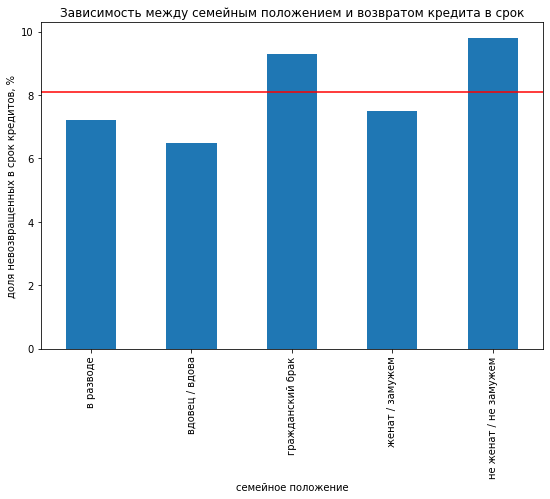

In [56]:
# создадим диаграмму по доле невозвращенных кредитов в срок с ее средним значением
fig = plt.figure()
ax = fig.add_subplot()
df_pivot_family_status.iloc[:5]['percent_non_return'].plot(kind = 'bar', figsize = (9, 6), ax = ax)
ax.axhline(8.1, color = 'red')
ax.set(title = 'Зависимость между семейным положением и возвратом кредита в срок', xlabel = 'семейное положение', ylabel = 'доля невозвращенных в срок кредитов, %' )

In [57]:
# проведем сортировку таблицы по столбцу 'percent_non_return'
df_pivot_family_status = df_pivot_family_status.iloc[:5].sort_values(by = 'percent_non_return', ascending = True)
df_pivot_family_status

,number_of_credits,non_return,percent_non_return
family_status,,,
вдовец / вдова,954,62,6.5
в разводе,1185,85,7.2
женат / замужем,12290,927,7.5
гражданский брак,4129,386,9.3
не женат / не замужем,2794,273,9.8


### Вывод

   Для ответа на вопрос о зависимости между семейным положением и возвратом кредита в срок при помощи метода `pivot_table` создали сводную таблицу с группировкой по столбцу `family_status` и подсчетом количества значений и суммы значений в столбце `debt`. Затем в полученную таблицу добавили строку с итоговыми данными. После переименования столбцов в `number_of_credits` и `non_return` таблицу дополнили  столбцом `percent_non_return`, в котором для всех категорий рассчитали долю невозвращенных в срок кредитов. Для наглядного представления результатов анализа при помощи метода `plot` создали диаграмму, в которой с использованием метода `axhline` провели горизонтальную линию, соответствующую среднему показателю доли невозвращенных в срок кредитов по всей выборке (8,1%), а с использованием метода `set` добавили название таблицы и осей. Для распределения баллов при построении модели кредитного скоринга при помощи метода `sort_values` отсортировали таблицу по столбцу `percent_non_return` по возрастанию.    
   
   **Таким образом, в результате проведенного анализа следует, что зависимость между семейным положением и возвратом кредита в срок имеется. Так, лучше среднего показателя возвращают кредиты кредитополучатели, которые являются вдовцами/вдовами (6,5% невозвращенных в срок кредитов), в разводе (7,2% невозвращенных в срок кредитов), а также женатые/замужние (7,5% невозвращенных в срок кредитов). Хуже возвращают кредиты кредитополучатели, которые не женаты/не замужем (9,8% невозвращенных в срок кредитов) и состоящие в гражданском браке (9,3% невозвращенных в срок кредитов).**  

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [58]:
# создадим сводную таблицу с группировкой по столбцу 'total_income_group', добавим в нее
# итоговую строку
df_pivot_total_income = df.pivot_table(index = ['total_income_group'], values = 'debt', aggfunc = ('count', 'sum'))
df_pivot_total_income.loc['total'] = df_pivot_total_income.sum()
df_pivot_total_income

,count,sum
total_income_group,,
до 50 000,370,23
от 100 000 до 150 000,7130,621
от 150 000 до 200 000,4742,402
от 50 000 до 100 000,4070,330
свыше 200 000,5040,357
total,21352,1733


In [59]:
# переименуем столбцы 'count' и 'sum' и добавим в таблицу столбец 'percent_non_return'
df_pivot_total_income = df_pivot_total_income.rename(columns = {'count' : 'number_of_credits', 'sum' : 'non_return'})
df_pivot_total_income['percent_non_return'] = ((df_pivot_total_income['non_return'] / df_pivot_total_income['number_of_credits']) * 100).round(1)
df_pivot_total_income

,number_of_credits,non_return,percent_non_return
total_income_group,,,
до 50 000,370,23,6.2
от 100 000 до 150 000,7130,621,8.7
от 150 000 до 200 000,4742,402,8.5
от 50 000 до 100 000,4070,330,8.1
свыше 200 000,5040,357,7.1
total,21352,1733,8.1


[Text(0, 0.5, 'доля невозвращенных в срок кредитов, %'),
 Text(0.5, 0, 'месячный доход, рублей'),
 Text(0.5, 1.0, 'Зависимость между уровнем дохода и возвратом кредита в срок')]

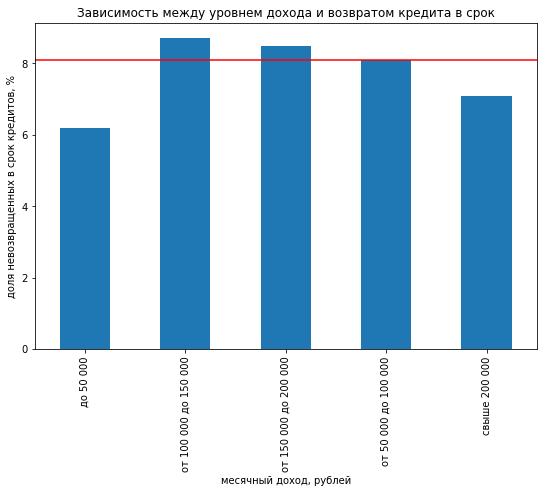

In [60]:
# создадим диаграмму по доле невозвращенных кредитов в срок с ее средним значением
fig = plt.figure()
ax = fig.add_subplot()
df_pivot_total_income.iloc[:5]['percent_non_return'].plot(kind = 'bar', figsize = (9, 6), ax = ax)
ax.axhline(8.1, color = 'red')
ax.set(title = 'Зависимость между уровнем дохода и возвратом кредита в срок', xlabel = 'месячный доход, рублей', ylabel = 'доля невозвращенных в срок кредитов, %')

In [61]:
# проведем сортировку таблицы по столбцу 'percent_non_return'
df_pivot_total_income = df_pivot_total_income.iloc[:5].sort_values(by = 'percent_non_return', ascending = True)
df_pivot_total_income

,number_of_credits,non_return,percent_non_return
total_income_group,,,
до 50 000,370,23,6.2
свыше 200 000,5040,357,7.1
от 50 000 до 100 000,4070,330,8.1
от 150 000 до 200 000,4742,402,8.5
от 100 000 до 150 000,7130,621,8.7


### Вывод

   Для ответа на вопрос о зависимости между уровнем дохода и возвратом кредита в срок при помощи метода `pivot_table` создали сводную таблицу с группировкой по столбцу `total_income_group` и подсчетом количества значений и суммы значений в столбце `debt`. Затем в полученную таблицу добавили строку с итоговыми данными. После переименования столбцов в `number_of_credits` и `non_return` таблицу дополнили  столбцом `percent_non_return`, в котором для всех категорий рассчитали долю невозвращенных в срок кредитов. Для наглядного представления результатов анализа при помощи метода `plot` создали диаграмму, в которой с использованием метода `axhline` провели горизонтальную линию, соответствующую среднему показателю доли невозвращенных в срок кредитов по всей выборке (8,1%), а с использованием метода `set` добавили название таблицы и осей. Для распределения баллов при построении модели кредитного скоринга при помощи метода `sort_values` отсортировали таблицу по столбцу `percent_non_return` по возрастанию.    
   
   **Таким образом, в результате проведенного анализа следует, что зависимость между уровнем дохода и возвратом кредита в срок имеется. Так, лучше среднего показателя возвращают кредиты кредитополучатели  с низким (6,2% невозвращенных в срок кредитов) и высоким уровнем дохода (7,1% невозвращенных в срок кредитов). Хуже возвращают кредиты кредитополучатели со средним уровнем дохода (8,7% невозвращенных в срок кредитов).**  

- Как разные цели кредита влияют на его возврат в срок?

In [62]:
# создадим сводную таблицу с группировкой по столбцу 'purpose_group', добавим в нее итоговую строку
df_pivot_purpose = df.pivot_table(index = ['purpose_group'], values = 'debt', aggfunc = ('count', 'sum'))
df_pivot_purpose.loc['total'] = df_pivot_purpose.sum()
df_pivot_purpose

,count,sum
purpose_group,,
операции с недвижимостью,10763,779
получение образования,3995,370
приобретение автомобиля,4284,400
проведение свадьбы,2310,184
total,21352,1733


In [63]:
# переименуем столбцы 'count' и 'sum' и добавим в таблицу столбец 'percent_non_return'
df_pivot_purpose = df_pivot_purpose.rename(columns = {'count' : 'number_of_credits', 'sum' : 'non_return'})
df_pivot_purpose['percent_non_return'] = ((df_pivot_purpose['non_return'] / df_pivot_purpose['number_of_credits']) * 100).round(1)
df_pivot_purpose

,number_of_credits,non_return,percent_non_return
purpose_group,,,
операции с недвижимостью,10763,779,7.2
получение образования,3995,370,9.3
приобретение автомобиля,4284,400,9.3
проведение свадьбы,2310,184,8.0
total,21352,1733,8.1


[Text(0, 0.5, 'доля невозвращенных в срок кредитов, %'),
 Text(0.5, 0, 'цель кредита'),
 Text(0.5, 1.0, 'Зависимость между целью кредита и возвратом его в срок')]

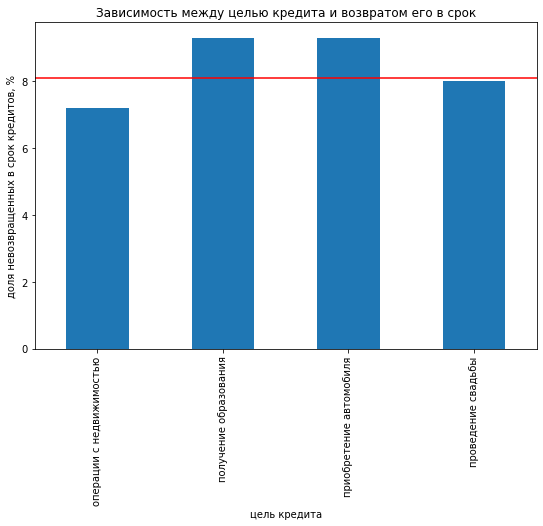

In [64]:
# создадим диаграмму по доле невозвращенных кредитов с ее средним значением
fig = plt.figure()
ax = fig.add_subplot()
df_pivot_purpose.iloc[:4]['percent_non_return'].plot(kind = 'bar', figsize = (9, 6), ax = ax)
ax.axhline(8.1, color = 'red')
ax.set(title = 'Зависимость между целью кредита и возвратом его в срок', xlabel = 'цель кредита', ylabel = 'доля невозвращенных в срок кредитов, %')

In [65]:
# проведем сортировку таблицы по столбцу 'percent_non_return'
df_pivot_purpose = df_pivot_purpose.iloc[:4].sort_values(by = 'percent_non_return', ascending = True)
df_pivot_purpose

,number_of_credits,non_return,percent_non_return
purpose_group,,,
операции с недвижимостью,10763,779,7.2
проведение свадьбы,2310,184,8.0
получение образования,3995,370,9.3
приобретение автомобиля,4284,400,9.3


### Вывод

   Для ответа на вопрос о зависимости между целью кредита и возвратом его в срок при помощи метода `pivot_table` создали сводную таблицу с группировкой по столбцу `purpose_group` и подсчетом количества значений и суммы значений в столбце `debt`. Затем в полученную таблицу добавили строку с итоговыми данными. После переименования столбцов в `number_of_credits` и `non_return` таблицу дополнили  столбцом `percent_non_return`, в котором для всех категорий рассчитали долю невозвращенных в срок кредитов. Для наглядного представления результатов анализа при помощи метода `plot` создали диаграмму, в которой с использованием метода `axhline` провели горизонтальную линию, соответствующую среднему показателю доли невозвращенных в срок кредитов по всей выборке (8,1%), а с использованием метода `set` добавили название таблицы и осей. Для распределения баллов при построении модели кредитного скоринга при помощи метода `sort_values` отсортировали таблицу по столбцу `percent_non_return` по возрастанию.     
   
   **Таким образом, в результате проведенного анализа следует, что зависимость между целью кредита и возвратом его в срок имеется. Так, лучше среднего показателя возвращают кредиты кредитополучатели, которые получали их для операций с недвижимостью (7,2% невозвращенных в срок кредитов) и для проведения свадьбы (8,0% невозвращенных в срок кредитов). Хуже возвращают кредиты кредитополучатели, которые получали их для  получения образования и приобретения автомобиля (по 9,3% невозвращенных в срок кредитов).**   

### Шаг 4. Общий вывод <a name="#start"></a>

   **В результате проведенного анализа рекомендуем:**  
   1. Требовать от кредитополучателей заполнения анкет в полном объеме, так как некоторая информация (например данные о доходах клиентов) является существенной для одобрения выдачи кредита.  
   2. Минимизировать количество ошибок при вводе информации из анкет кредитополучателей в базы данных.  
   3. Инициировать внесение изменений в анкету кредитополучателя, определив исчерпывающий унифицированный перечень целей кредита.  
   4. Для оценки показателей при построении модели кредитного скоринга использовать следующее распределение (в порядке убывания баллов):  
   > для учета зависимости между наличием детей и возвратом кредита в срок:   
   >> 3 и более детей   
   >> нет детей   
   >> 1 ребенок   
   >> 2 детей   
   
   > для учета зависимости между семейным положением и возвратом кредита в срок:   
   >> вдовец / вдова   
   >> в разводе   
   >> женат / замужем   
   >> гражданский брак   
   >> не женат / не замужем   
   
   > для учета зависимости между уровнем дохода и возвратом кредита в срок:  
   >> до 50 000   
   >> свыше 200 000   
   >> от 50 000 до 100 000   
   >> от 150 000 до 200 000   
   >> от 100 000 до 150 000   
   
   > для учета зависимости между целью кредита и возвратом его в срок:  
   >> операции с недвижимостью  
   >> проведение свадьбы   
   >> получение образования и приобретение автомобиля.   

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.